In [1]:
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
iris = pd.read_csv("iris.csv", delimiter=";", encoding="latin-1")
iris

,Longueur des sépales,Largeur des sépales,Longueur des pétales,Largeur des pétales,Espèce
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


#### Je crée un dataframe qui va contenir toute les varibles sur les quel je souhaite faire mon clustering

In [5]:
X=iris[iris.columns[:-1]]

#### Lancement de l'algorithme
- Je choisi le nombre de groupes que je souhaite constituer
- Je stocke mon modèle dans la variable kmeans
- Je lance l'algorithme avec la méthode .fit_predict() et je récupère le tout dans la variable y_pred.

In [9]:
k = 3
clustering = KMeans(n_clusters=k, random_state=42)
y_pred = clustering.fit_predict(X)

In [10]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [11]:
clustering.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

#### Je viens ajouter à mon dataframe les groupes identifiés et les centres de mes clusters.

In [12]:
iris['predict']=y_pred

In [13]:
centre = pd.DataFrame(clustering.cluster_centers_, columns=iris.columns[:-2])
centre[iris.columns[-2]] = -1
centre[iris.columns[-1]] = -1
iris = iris.append(centre)

In [14]:
iris

,Longueur des sépales,Largeur des sépales,Longueur des pétales,Largeur des pétales,Espèce,predict
0,5.100000,3.500000,1.400000,0.200000,1,1
1,4.900000,3.000000,1.400000,0.200000,1,1
2,4.700000,3.200000,1.300000,0.200000,1,1
3,4.600000,3.100000,1.500000,0.200000,1,1
4,5.000000,3.600000,1.400000,0.200000,1,1
...,...,...,...,...,...,...
148,6.200000,3.400000,5.400000,2.300000,3,2
149,5.900000,3.000000,5.100000,1.800000,3,0
0,5.901613,2.748387,4.393548,1.433871,-1,-1
1,5.006000,3.428000,1.462000,0.246000,-1,-1


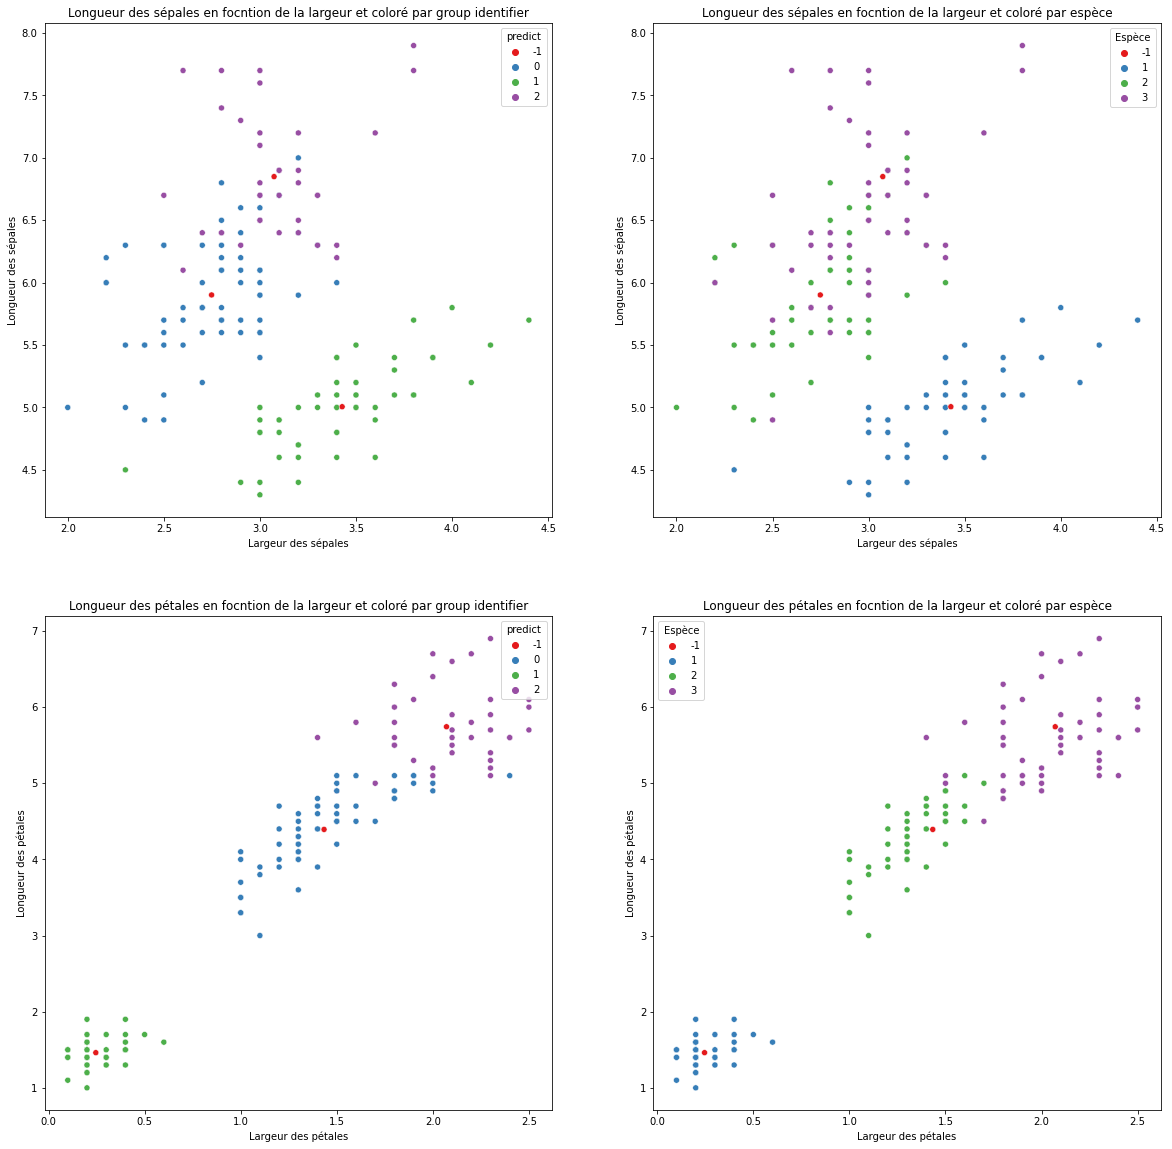

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

k = 3
clustering = KMeans(n_clusters=k, random_state=42)
y_pred = clustering.fit_predict(X)

plt.figure(figsize=[20,20])
plt.subplot(221)
sns.scatterplot(data=iris, y='Longueur des sépales', x='Largeur des sépales',
                hue='predict', palette="Set1")
plt.title("Longueur des sépales en focntion de la largeur et coloré par group identifier")

plt.subplot(222)
sns.scatterplot(data=iris, y='Longueur des sépales', x='Largeur des sépales',
                hue='Espèce', palette="Set1")
plt.title("Longueur des sépales en focntion de la largeur et coloré par espèce")


plt.subplot(223)
sns.scatterplot(data=iris, y='Longueur des pétales', x='Largeur des pétales',
                hue='predict', palette="Set1")
plt.title("Longueur des pétales en focntion de la largeur et coloré par group identifier")

plt.subplot(224)
sns.scatterplot(data=iris, y='Longueur des pétales', x='Largeur des pétales',
                hue='Espèce', palette="Set1")
plt.title("Longueur des pétales en focntion de la largeur et coloré par espèce")

plt.show()

In [19]:
clustering.inertia_

78.851441426146

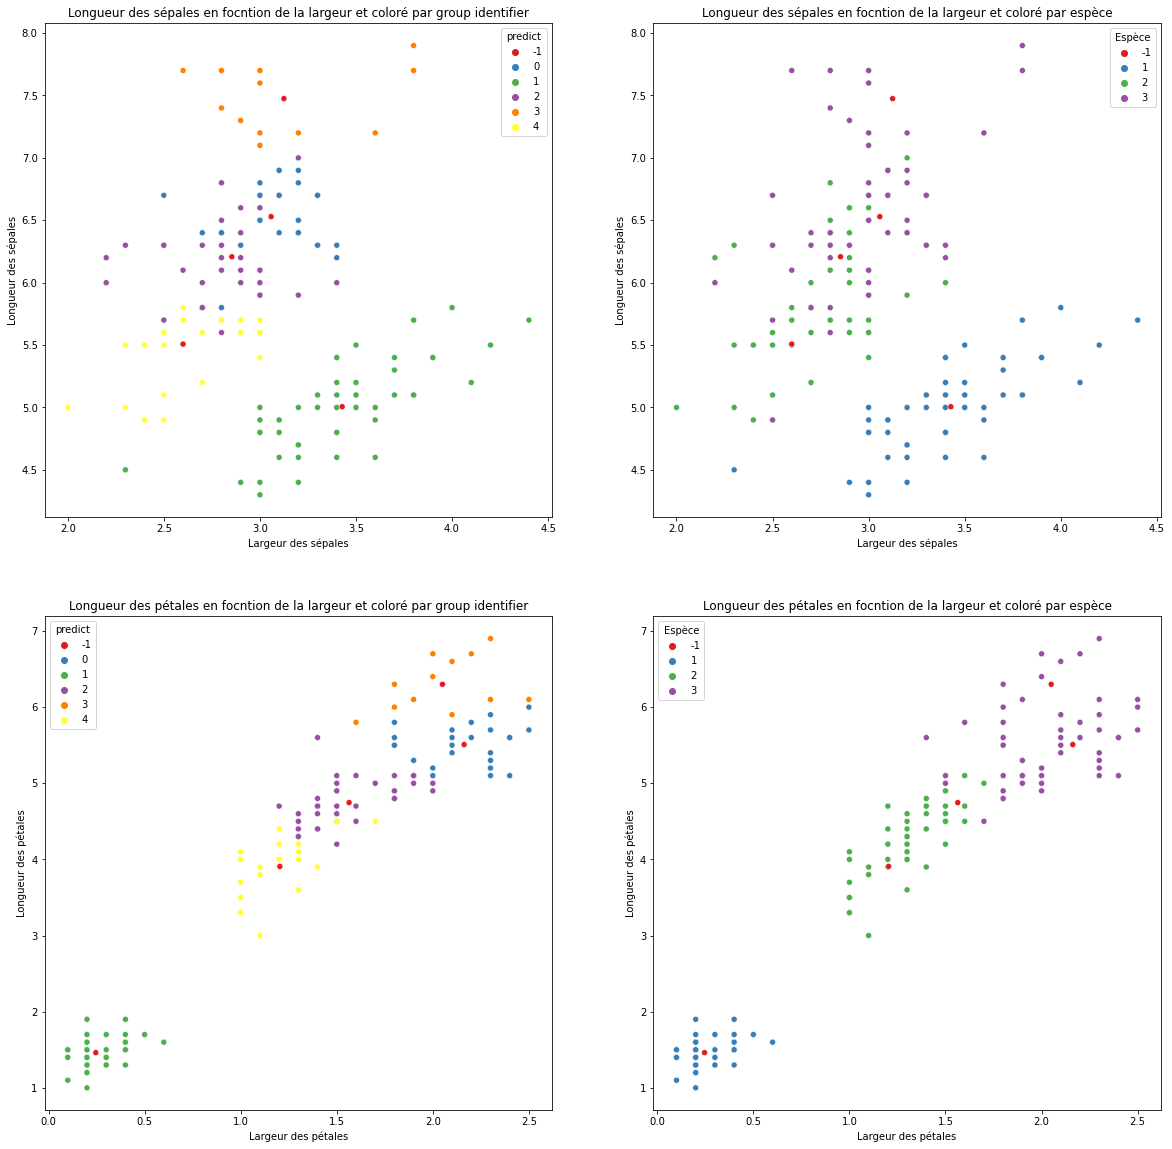

In [21]:
k = 5
clustering = KMeans(n_clusters=k, random_state=42)
y_pred = clustering.fit_predict(X)

iris = pd.read_csv("iris.csv", delimiter=";", encoding="latin-1")
iris["predict"]=y_pred

centre = pd.DataFrame(clustering.cluster_centers_, columns=iris.columns[:-2])
centre[iris.columns[-2]] = -1
centre[iris.columns[-1]] = -1
iris = iris.append(centre)

plt.figure(figsize=[20,20])
plt.subplot(221)
sns.scatterplot(data=iris, y='Longueur des sépales', x='Largeur des sépales',
                hue='predict', palette="Set1")
plt.title("Longueur des sépales en focntion de la largeur et coloré par group identifier")

plt.subplot(222)
sns.scatterplot(data=iris, y='Longueur des sépales', x='Largeur des sépales',
                hue='Espèce', palette="Set1")
plt.title("Longueur des sépales en focntion de la largeur et coloré par espèce")


plt.subplot(223)
sns.scatterplot(data=iris, y='Longueur des pétales', x='Largeur des pétales',
                hue='predict', palette="Set1")
plt.title("Longueur des pétales en focntion de la largeur et coloré par group identifier")

plt.subplot(224)
sns.scatterplot(data=iris, y='Longueur des pétales', x='Largeur des pétales',
                hue='Espèce', palette="Set1")
plt.title("Longueur des pétales en focntion de la largeur et coloré par espèce")

plt.show()

In [134]:
clustering.inertia_

46.44618205128204

#### On peut standardisé les données pour compenser les différence d'échelle et utiliser un pipeline

In [144]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

k=4
model = make_pipeline(StandardScaler(),
                     KMeans(n_clusters=k, random_state=42))


model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2,
       2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3,
       2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 0, 2, 0, 2, 0, 0, 3, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 0, 0, 3, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2])

In [22]:
cluster = [i for i in range(1,10)]
inertie = []

iris = pd.read_csv("iris.csv", delimiter=";", encoding="latin-1")
X=iris[iris.columns[:-1]]

for i in cluster:
    k = i
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    
    inertie.append(clustering.inertia_)

inertie

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 34.40900974025975,
 30.063110617452732,
 27.98222120518689]

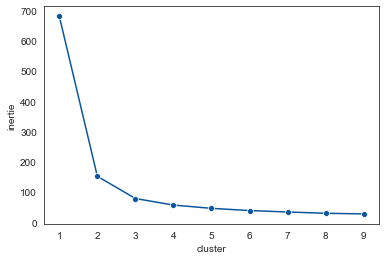

In [164]:
data = pd.DataFrame({'cluster':cluster, 'inertie':inertie})
sns.lineplot(data=data, x="cluster", y="inertie", marker='o')

La courbe prend une forme coudée.

La partition en K = 3 classes est la dernière à induire un gain informationnel significatif (réduction inertie intra 
augmentation de l’inertie inter).
Il y a donc un faible inerêt à aller au dela de 3 clusters.

#### Score de silhouette 
Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation). Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. A l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points. 

In [171]:
from sklearn.metrics import silhouette_score
silhouette_score(X, clustering.labels_)

0.3402234017590587

#### Mini-Batch K-Means

In [23]:
from sklearn.cluster import MiniBatchKMeans

In [24]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [25]:
minibatch_kmeans.inertia_

50.30392527629499

#### Pour les variables catégorieles

In [29]:
from sklearn.preprocessing import OneHotEncoder

bank = pd.read_csv("bank-full.csv",
                   delimiter=";", na_values="unknown")

bank=bank.dropna()

list_num = ["age", "balance", "day", "duration", "campaign",
            "pdays", "previous", "y"]
list_cat = ["job", "marital", "education", "default", "housing",
               "loan", "contact", "month", "poutcome", "y"]

cat_encoder = OneHotEncoder()
bank_long_1hot = cat_encoder.fit_transform(bank[list_cat])
bank_long_1hot.toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [30]:
df = pd.DataFrame(bank_long_1hot.toarray())
df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7838,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7839,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7840,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
